# Titanic - Machine Learning from Disaster
https://www.kaggle.com/c/titanic/overview

In [1]:
# basic library
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# visulization library
import matplotlib.pyplot as plt
import seaborn as sns

# deep learning library
import tensorflow as tf
from tensorflow import keras

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')
sample_submission = pd.read_csv('./gender_submission.csv')

In [3]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Data cleaning

### Useless columns

In [6]:
# Get rid of columns that are not useful
train = train_df.drop(columns= ['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test = test_df.drop(columns= ['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [7]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Check distribution of Age Box plot over Survived data

<AxesSubplot:xlabel='Survived', ylabel='Age'>

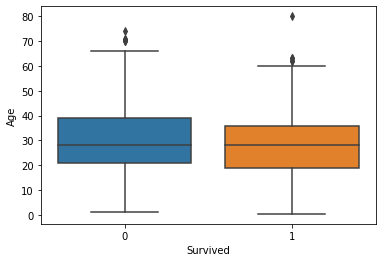

In [8]:
sns.boxplot(x="Survived", y="Age", data=train_df)

In [9]:
train['Age'] = train['Age'].fillna(train['Age'].mean())
test['Age'] = test['Age'].fillna(test['Age'].mean())

<AxesSubplot:xlabel='Embarked', ylabel='count'>

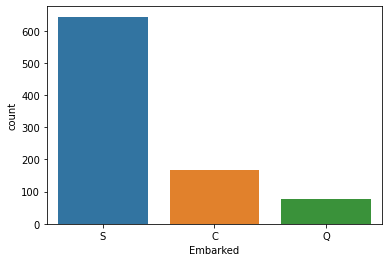

In [10]:
sns.countplot(x='Embarked', data=train)

In [11]:
train['Embarked'] = train['Embarked'].fillna('C')

In [12]:
## Splitting Features and Labels

### Seperate the features and Labels

In [13]:
# store feature matrix in "X"
X_train = train.iloc[:, 1:]   

# store response vector in "y"
y_train = train.iloc[:,0]    

print(X_train.shape)
print(y_train.shape)

(891, 7)
(891,)


In [14]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [15]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [16]:
## Preprocess the PClass column 
def preprocess_pclass_cols(df):
    #converting integer classes to Letters and prepare for One Hot Encoding
    df['Pclass'] = df['Pclass'].map({1: 'AC', 2: 'BC', 3 : 'CC'})
    return df

In [17]:
X_train = preprocess_pclass_cols(X_train)
X_test = preprocess_pclass_cols(test)

## One hot Encoding of Col: Sex, Embarked.
Check with One hot encoding on PClass also

In [18]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(test)

In [19]:
X_train.head()

,Age,SibSp,Parch,Fare,Pclass_AC,Pclass_BC,Pclass_CC,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


## Preprocssing the data
* Scalar Transformation

In [20]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
X_train[0]

array([-0.5924806 ,  0.43279337, -0.47367361, -0.50244517, -0.56568542,
       -0.51015154,  0.90258736, -0.73769513,  0.73769513, -0.48557557,
       -0.30756234,  0.61930636])

## Model Creation

In [22]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(12, input_shape=X_train.shape[1:], kernel_initializer='he_normal'))
model.add(keras.layers.Activation('elu'))

# 1st hidden layer
model.add(keras.layers.Dense(200, kernel_initializer='he_normal'))
model.add(keras.layers.Activation('elu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.BatchNormalization())

# 2nd hidden layer
model.add(keras.layers.Dense(200, kernel_initializer='he_normal'))
model.add(keras.layers.Activation('elu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.BatchNormalization())

# 3rd hidden layer
model.add(keras.layers.Dense(200, kernel_initializer='he_normal'))
model.add(keras.layers.Activation('elu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.BatchNormalization())

# 4th hidden layer
model.add(keras.layers.Dense(200, kernel_initializer='he_normal'))
model.add(keras.layers.Activation('elu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.BatchNormalization())

# 5th hidden layer
model.add(keras.layers.Dense(200, kernel_initializer='he_normal'))
model.add(keras.layers.Activation('elu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.BatchNormalization())

# output layer
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                156       
_________________________________________________________________
activation (Activation)      (None, 12)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               2600      
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 200)               800       
_________________________________________________________________
dense_2 (Dense)              (None, 200)               4

In [24]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('model.h5', verbose=1, monitor='accuracy',save_best_only=True, mode='auto') 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, callbacks=[checkpoint], verbose=False)


Epoch 00001: accuracy improved from -inf to 0.57912, saving model to model.h5

Epoch 00002: accuracy improved from 0.57912 to 0.69136, saving model to model.h5

Epoch 00003: accuracy improved from 0.69136 to 0.71044, saving model to model.h5

Epoch 00004: accuracy did not improve from 0.71044

Epoch 00005: accuracy improved from 0.71044 to 0.72952, saving model to model.h5

Epoch 00006: accuracy improved from 0.72952 to 0.74074, saving model to model.h5

Epoch 00007: accuracy improved from 0.74074 to 0.74747, saving model to model.h5

Epoch 00008: accuracy did not improve from 0.74747

Epoch 00009: accuracy did not improve from 0.74747

Epoch 00010: accuracy did not improve from 0.74747

Epoch 00011: accuracy improved from 0.74747 to 0.75421, saving model to model.h5

Epoch 00012: accuracy improved from 0.75421 to 0.77441, saving model to model.h5

Epoch 00013: accuracy did not improve from 0.77441

Epoch 00014: accuracy did not improve from 0.77441

Epoch 00015: accuracy improved fro

In [25]:
y_pred = model.predict(X_test)
test_labels = sample_submission['Survived']
y_pred = y_pred.round().astype(int)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(sample_submission['Survived'], y_pred)
print(cm)
accuracy_score(sample_submission['Survived'], y_pred)

[[  0   0   0]
 [  1 255  10]
 [  0  44 108]]


0.868421052631579

In [26]:
sample_submission['Survived'] = y_pred
sample_submission.to_csv('out.csv',index=False)